# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_binary_200_review.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:202 ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,1,0.442789,0.226327,-3.395011,0.761912,-1.181912,-2.057796,1.901030,1.522585,1.423520,...,-0.868301,-0.086499,-1.845631,0.055275,-0.643941,1.154629,0.672262,-1.960425,0.978955,1.969951
1,1,-0.028265,1.410163,-2.657692,0.825858,0.435628,-0.972779,1.769565,1.036833,1.384876,...,-1.698915,-1.105859,-0.437742,0.587427,0.048230,-0.216112,1.084762,-2.144046,1.397851,0.873189
2,1,0.269204,0.884609,-1.665391,1.609233,-0.564921,0.837579,1.007009,-0.886500,0.638139,...,-0.221767,-2.244491,-1.593955,-0.136215,-0.294638,-0.849120,-0.267188,-1.294744,0.276453,-0.562008
3,0,0.239312,0.799451,-2.839295,0.810844,0.533907,-0.948322,1.995090,0.853652,1.670330,...,-1.495095,-1.396998,-0.734805,0.479203,-0.163358,-0.100398,0.647680,-2.374888,1.707838,0.507836
4,1,-0.351865,-1.245096,-0.744767,-1.102401,0.138185,1.691464,0.830067,0.261012,0.593560,...,1.819882,-0.315093,-2.720363,-1.119180,0.080892,-1.040733,0.136569,-1.674414,0.958555,-1.271945


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:202] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.442789  0.226327 -3.395011  0.761912 -1.181912 -2.057796  1.901030   
1   -0.028265  1.410163 -2.657692  0.825858  0.435628 -0.972779  1.769565   
2    0.269204  0.884609 -1.665391  1.609233 -0.564921  0.837579  1.007009   
3    0.239312  0.799451 -2.839295  0.810844  0.533907 -0.948322  1.995090   
4   -0.351865 -1.245096 -0.744767 -1.102401  0.138185  1.691464  0.830067   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.121525  0.789393 -1.679044 -0.338311 -0.033060  0.143954  0.686666   
177 -0.217280  0.614284 -3.202434  1.415873 -0.034867 -1.669631  1.756469   
178 -0.015025  0.468370 -1.550519 -0.117665 -0.567333 -0.207721  0.605682   
179 -0.244144  1.576056 -1.483863  0.089200 -0.107631 -0.831589  0.260183   
180 -0.161056  0.517091 -1.964447  0.106236 -0.606570 -0.446199  0.921929   

            7         8         9  ...       190       191       192  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 15],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 15], 'random_state': [125]})

In [6]:
print("Mejor estimación de parámetros según GridSearchCV:")
print(clf.best_estimator_)
model = clf.best_estimator_

Mejor estimación de parámetros según GridSearchCV:
RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       n_estimators=15, random_state=125)


In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))


Best result of the cross validation of the model with the best paramters:0.6386699507389163


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0
yTrain=yTrain.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0
yTest=yTest.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.7361111111111112
Final accuracy on the testing dataset: 0.5405405405405406


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[43 25]
 [13 63]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69        68
           1       0.72      0.83      0.77        76

    accuracy                           0.74       144
   macro avg       0.74      0.73      0.73       144
weighted avg       0.74      0.74      0.73       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 4 13]
 [ 4 16]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.50      0.24      0.32        17
           1       0.55      0.80      0.65        20

    accuracy                           0.54        37
   macro avg       0.53      0.52      0.49        37
weighted avg       0.53      0.54      0.50        37



Features with relevance over 0:  36
Features with relevance over 0.05:  3


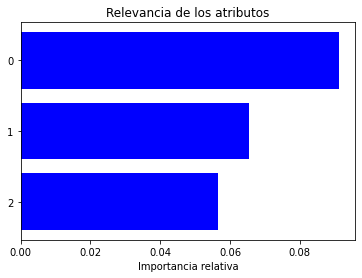

0 = 0.02250415890288088
1 = 0.009804537193579706
2 = 0.0
3 = 0.009157324018736295
4 = 0.0
5 = 0.0
6 = 0.0
7 = 0.0
8 = 0.018809432358090846
9 = 0.0
10 = 0.0
11 = 0.0
12 = 0.0
13 = 0.0
14 = 0.0
15 = 0.0
16 = 0.0
17 = 0.0
18 = 0.0
19 = 0.01930321713967377
20 = 0.0
21 = 0.0
22 = 0.0
23 = 0.0
24 = 0.03710377385905983
25 = 0.09136780469019898
26 = 0.0
27 = 0.0
28 = 0.0
29 = 0.0
30 = 0.06550549588459634
31 = 0.0
32 = 0.0
33 = 0.0269603501540779
34 = 0.0
35 = 0.0
36 = 0.02357025308024131
37 = 0.0
38 = 0.0
39 = 0.0
40 = 0.0
41 = 0.0
42 = 0.0
43 = 0.0
44 = 0.0
45 = 0.0
46 = 0.0
47 = 0.0
48 = 0.0
49 = 0.0
50 = 0.0
51 = 0.0
52 = 0.0
53 = 0.0
54 = 0.0
55 = 0.032141980969021024
56 = 0.0
57 = 0.0
58 = 0.0
59 = 0.0
60 = 0.0
61 = 0.0
62 = 0.0
63 = 0.0
64 = 0.0
65 = 0.0
66 = 0.0
67 = 0.0
68 = 0.0
69 = 0.0
70 = 0.0
71 = 0.0
72 = 0.0
73 = 0.0
74 = 0.0
75 = 0.024086278364759208
76 = 0.0
77 = 0.0
78 = 0.03235028286786938
79 = 0.027287269837459178
80 = 0.015908250334631134
81 = 0.030144451888633638
82 = 0.0


In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_

elems_over_0 = np.fromiter((element for element in importances if element > 0), dtype = importances.dtype)
print('Features with relevance over 0: ', len(elems_over_0))

newArray = np.fromiter((element for element in importances if element > 0.05), dtype = importances.dtype)
importances=newArray
indices = np.argsort(importances)
print('Features with relevance over 0.05: ', len(newArray))

plt.title('Relevancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.